In [7]:
# Original
text = """
   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.005    0.001   98.532   24.633 env_design.py:201(evaluate_regret_of_maze)
        1    0.000    0.000   76.822   76.822 env_design.py:225(brute_force_maze_design)
     3353   49.531    0.015   73.323    0.022 mdp_solver.py:6(value_iteration)
        1    0.003    0.003   20.994   20.994 multi_env_birl.py:13(bayesian_reward_learning)
     1001    0.026    0.000   20.921    0.021 multi_env_birl.py:104(get_likelihood)
 53432447    8.353    0.000    8.353    0.000 minigrid.py:812(get_transition_probabilities)
 10925494    5.127    0.000    5.129    0.000 {built-in method builtins.max}
 53432447    4.889    0.000    4.889    0.000 minigrid.py:816(get_reward)
 53508332    2.852    0.000    2.845    0.000 multiarray.py:741(dot)
        2    0.000    0.000    1.564    0.782 auxiliary.py:52(plot_heatmaps)
        2    0.003    0.002    1.176    0.588 auxiliary.py:21(get_expert_trajectory)
"""

In [11]:
# Edited for presentation
text = """
   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.005    0.001   98.532   24.633 evaluate_regret_of_maze
        1    0.000    0.000   76.822   76.822 brute_force_maze_design
     3353   49.531    0.015   73.323    0.022 value_iteration
        1    0.003    0.003   20.994   20.994 bayesian_reward_learning
     1001    0.026    0.000   20.921    0.021 get_likelihood
 53432447    8.353    0.000    8.353    0.000 get_transition_probabilities
 10925494    5.127    0.000    5.129    0.000 max
 53432447    4.889    0.000    4.889    0.000 get_reward
 53508332    2.852    0.000    2.845    0.000 np.dot
        2    0.000    0.000    1.564    0.782 plot_heatmaps
        2    0.003    0.002    1.176    0.588 get_expert_trajectory
"""

In [12]:
lines = text.strip().split("\n")[1:]
data = []
for line in lines:
    fields = line.split()
    data.append(
        {
            "ncalls": int(fields[0]),
            "tottime": float(fields[1]),
            "cumtime": float(fields[3]),
            "func": fields[-1],
        }
    )

In [13]:
import pandas as pd

df = pd.DataFrame(data)

df.head()

,ncalls,tottime,cumtime,func
0,4,0.005,98.532,evaluate_regret_of_maze
1,1,0.000,76.822,brute_force_maze_design
2,3353,49.531,73.323,value_iteration
3,1,0.003,20.994,bayesian_reward_learning
4,1001,0.026,20.921,get_likelihood


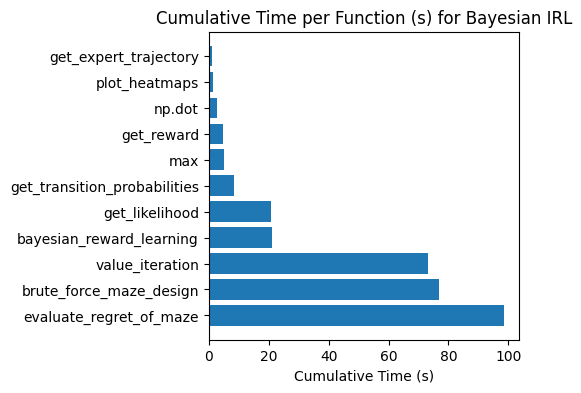

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.barh(df["func"], df["cumtime"])
plt.xlabel("Cumulative Time (s)")
# plt.ylabel("Function")
_ = plt.title("Cumulative Time per Function (s) for Bayesian IRL")